In [1]:
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import pandas.util.testing as tm
import os
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras import backend as K
import pickle
import cv2
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

C:\Users\Rajat\anaconda3\envs\tfr\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if __name__ == '__main__':
Using TensorFlow backend.


In [2]:
default_image_size=tuple((128, 128))
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)  
            
            return  img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [3]:
directory_root='PlantVillage'
image_list=[]
img_name=[]
list_img_filename=[]

In [4]:
for  dirname,dis,filenames in os.walk(directory_root):
    #list_img_array.append(dirname)
    for filename in filenames:
     
        if filename.endswith(".jpg") == True or filename.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(os.path.join(dirname,filename)))
            img_name.append(dirname)
            list_img_filename.append(filename)

In [5]:
image_list[0]

array([[[104., 101., 116.],
        [111., 108., 123.],
        [122., 119., 134.],
        ...,
        [153., 152., 168.],
        [151., 150., 166.],
        [154., 153., 169.]],

       [[108., 105., 120.],
        [133., 130., 145.],
        [112., 109., 124.],
        ...,
        [155., 154., 170.],
        [155., 154., 170.],
        [148., 147., 163.]],

       [[119., 116., 131.],
        [111., 108., 123.],
        [105., 102., 117.],
        ...,
        [156., 155., 171.],
        [152., 151., 167.],
        [156., 155., 171.]],

       ...,

       [[165., 158., 171.],
        [167., 160., 173.],
        [175., 168., 181.],
        ...,
        [160., 151., 164.],
        [159., 150., 163.],
        [165., 156., 169.]],

       [[159., 152., 165.],
        [178., 171., 184.],
        [172., 165., 178.],
        ...,
        [158., 149., 162.],
        [155., 146., 159.],
        [156., 147., 160.]],

       [[156., 149., 162.],
        [167., 160., 173.],
        [169., 1

In [6]:
img_name[2]

'PlantVillage\\Pepper__bell___Bacterial_spot'

In [7]:
from sklearn.preprocessing import LabelBinarizer

In [8]:
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(img_name)
pickle.dump(label_binarizer,open('label_trns.pkl','wb'))
n_classes1 = len(label_binarizer.classes_)

In [9]:
n_classes1

13

In [10]:
print(len(image_list))
print(len(img_name))
b=len(labels)

18859
18859


In [11]:
%load_ext tensorboard

In [12]:
label_list=[]
from os import listdir
root_dir = listdir('PlantVillage')

In [13]:
for classifi in root_dir:
    desis = os.listdir(f"{directory_root}/{classifi}")
    label_list.append(classifi)

In [14]:
from datetime import datetime
log_dir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [15]:
X=np.array(image_list)

In [16]:
X=X/255

In [17]:
print("[INFO] Spliting data to train, test")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2,stratify=labels, random_state = 42)

[INFO] Spliting data to train, test


In [18]:
model = tf.keras.applications.ResNet50(weights="imagenet", include_top=False,input_shape=(128,128,3))

In [19]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [20]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [21]:
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [22]:
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=  tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=  tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
preds = tf.keras.layers.Dense(len(label_list), activation = 'softmax')(x)

In [23]:
model = tf.keras.models.Model(inputs = model.input, outputs = preds)

In [24]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [25]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [26]:
for layer in model.layers[:175]:
    layer.trainable = False

In [27]:
for layer in model.layers[175:]:
    layer.trainable = True

In [28]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
from datetime import datetime
log_dir="logs\\fit\\" + datetime.now().strftime("%Y%m%d dg -%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [30]:
hist2=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5,callbacks=[tensorboard_callback,EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001),])

Train on 15087 samples, validate on 3772 samples
Epoch 1/5
15087/15087 [==============================] - 2405s 159ms/sample - loss: 0.8154 - accuracy: 0.7741 - val_loss: 4.2285 - val_accuracy: 0.1129
Epoch 2/5
15087/15087 [==============================] - 2367s 157ms/sample - loss: 0.4249 - accuracy: 0.8896 - val_loss: 25.5675 - val_accuracy: 0.1129
Epoch 3/5
15087/15087 [==============================] - 2362s 157ms/sample - loss: 0.3811 - accuracy: 0.9148 - val_loss: 26.9111 - val_accuracy: 0.1129
Epoch 4/5
15087/15087 [==============================] - 2831s 188ms/sample - loss: 0.3344 - accuracy: 0.9244 - val_loss: 54.2801 - val_accuracy: 0.1129


In [7]:
model.save('vgg16_rmsprop.h5')

NameError: name 'model' is not defined

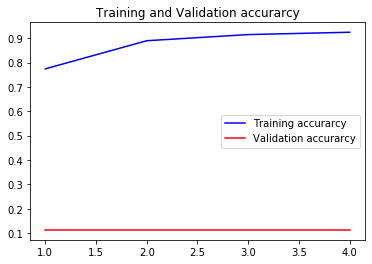

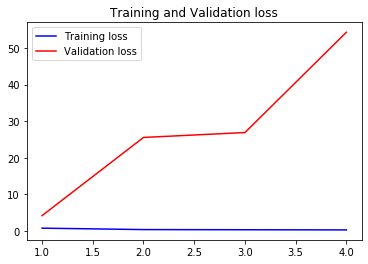

In [13]:
import matplotlib.pyplot as plt

acc = [0.7741,0.8896,0.9148,0.9244]
val_acc = [0.1129,0.1129,0.1129,0.1129]
loss = [0.8154,0.4249,0.3811,0.3344]
val_loss = [4.2285,25.5675,26.9111,54.2801]
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()